<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

C:\Users\sharnit\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<b><h1>Task 1: Become familiar with the dataset!

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [38]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<b><h1>Task 2: Generate Descriptive Statistics and Visualizations!

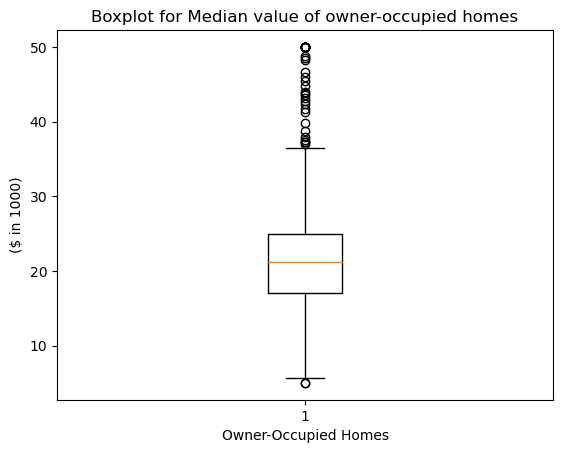

In [50]:
#For the "Median value of owner-occupied homes" provide a boxplot
pyplot.boxplot(boston_df.MEDV)
pyplot.title("Boxplot for Median value of owner-occupied homes")
pyplot.ylabel("($ in 1000)")
pyplot.xlabel("Owner-Occupied Homes")
pyplot.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


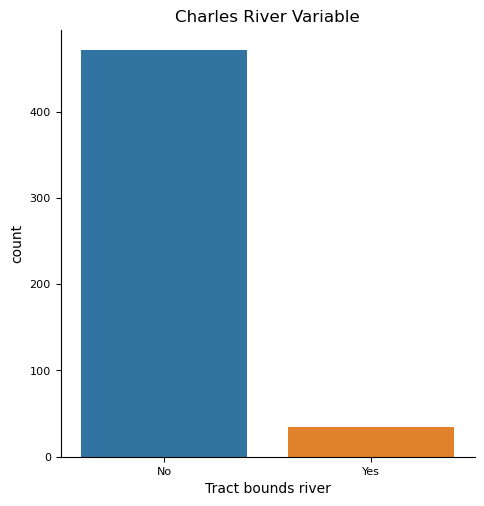

CHAS
No     471
Yes     35
Name: count, dtype: int64


In [8]:
#Provide a  bar plot for the Charles river variable

sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title("Charles River Variable")
pyplot.xlabel("Tract bounds river")
pyplot.xticks([0, 1], ['No', 'Yes'])
pyplot.tick_params(axis='both', which='major', labelsize=8)
pyplot.show()

chas_counts = boston_df['CHAS'].value_counts().rename({0: 'No', 1: 'Yes'})
print(chas_counts)

<b> Majority of the areas are not bounded by the river

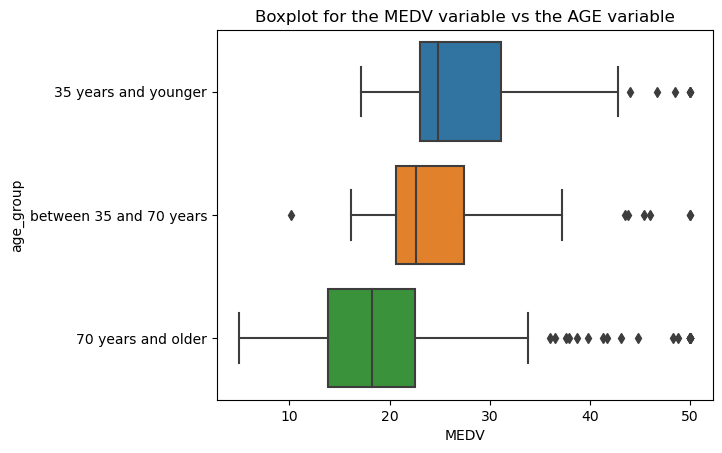

In [51]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'
boston_df
age_group_order = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df, order=age_group_order)
pyplot.title("Boxplot for the MEDV variable vs the AGE variable")
pyplot.show()

<b> Observation - The lower age of housing in a neighborhood, the higher is the median value of owner-occupied homes.

<function matplotlib.pyplot.show(close=None, block=None)>

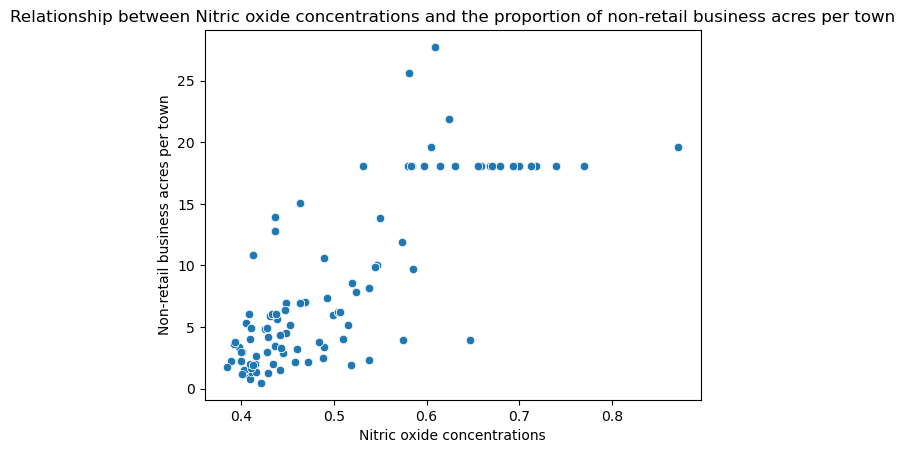

In [12]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business 
#acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")

pyplot.ylabel("Non-retail business acres per town")
pyplot.xlabel("Nitric oxide concentrations")
pyplot.tick_params(axis='both', which='major')
pyplot.show

<b> when we had lower non retail business, nitric oxide concentrations were found low. Where there is an increase in business, the concentrations increased as well

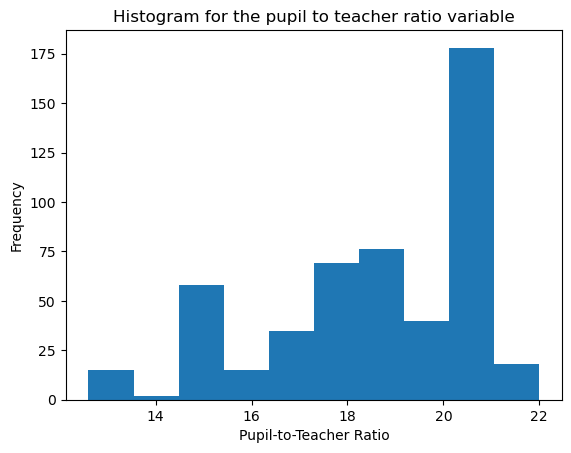

In [20]:
#Create a histogram for the pupil to teacher ratio variable

pyplot.hist(boston_df['PTRATIO'], alpha=1)
pyplot.title("Histogram for the pupil to teacher ratio variable")
pyplot.xlabel("Pupil-to-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.tick_params(axis='both', which='major')
pyplot.show()

<b>The most common pupil-to-teacher ratios is just above 20.

<b><h1>Task 3: Use the appropriate tests to answer the questions provided.

In [36]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

a = boston_df[boston_df["CHAS"] == 1]["MEDV"]
b = boston_df[boston_df["CHAS"] == 0]["MEDV"]

t_stat, p_value = scipy.stats.ttest_ind(a, b, equal_var=False)  
print(f"TStat: {t_stat:.3f}")
print(f"PValue: {p_value:.3e}")

TStat: 3.113
PValue: 3.567e-03


<b>  p-value < 0.05 - we reject the null hypothesis. There is a difference in median housing prices b/w tracts that bound the Charles River and those that do not.

In [24]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner 
#occupied units built prior to 1940 (AGE)? (ANOVA)

boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)
print("F-Statistic", f_stats)
print("P-value", p_value)

F-Statistic 36.40764999196599
P-value 1.7105011022702984e-15


<b> Since the p-value is less than 0.05, we reject the null hypothesis. There is a difference in the median home values b/w at least two of the age groups.

In [37]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion 
#of non-retail business acres per town? (Pearson Correlation)
#H0: NOX is not correlated with INDUS
#H1: NOX is correlated with INDUS

X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           7.91e-98
Time:                        13:18:25   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> We can reject the null hypothesis that NOX has no effect on INDUS, hence a relationship exists between Nitric Oxide and non-retail business acres per town. Looking at the corfficient for NOX, for each one-unit increase in NOX, the INDUS variable increases by approximately 45.21 units

In [31]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value 
# of owner occupied homes? #(Regression analysis)

y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        19:40:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Pearson Coeffiecent value
np.sqrt(0.062)

0.24899799195977465

<b>Same as above p value is very low nearing zero, reject null hypothesis. For each unit increase in DIS, the median value of owner-occupied homes increases by 1.0916 thousand $. with positive coeff a direct relationshp is there between DIS and MEDV.